In [13]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [14]:
data=pd.read_csv('dataset_olympics.csv')

In [15]:
data.isnull().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

In [6]:
data.dropna(subset=['Age', 'Weight', 'Height'], inplace= True)
data['Medal'].fillna(value="NA", inplace=True)

In [12]:
data.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [4]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NA
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NA


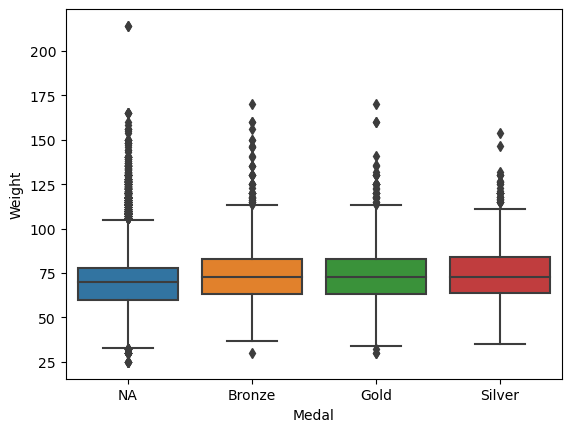

In [5]:
sb.boxplot( x=data["Medal"], y=data["Weight"] );
plt.show()

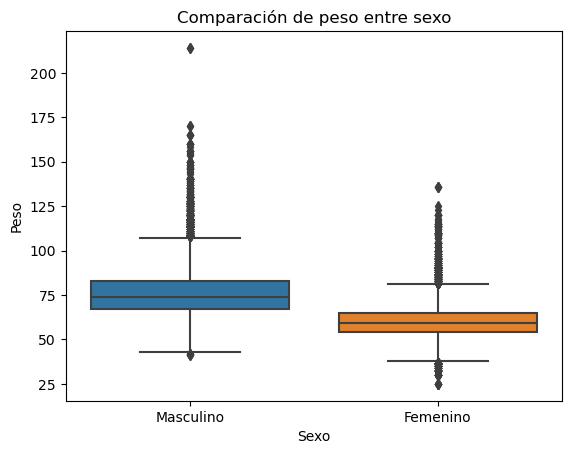

In [15]:
sb.boxplot(x=data['Sex'],y=data['Weight'])
plt.title('Comparación de peso entre sexo')
plt.xlabel('Sexo')
plt.ylabel('Peso')
plt.xticks([0,1],['Masculino','Femenino'])
plt.show()

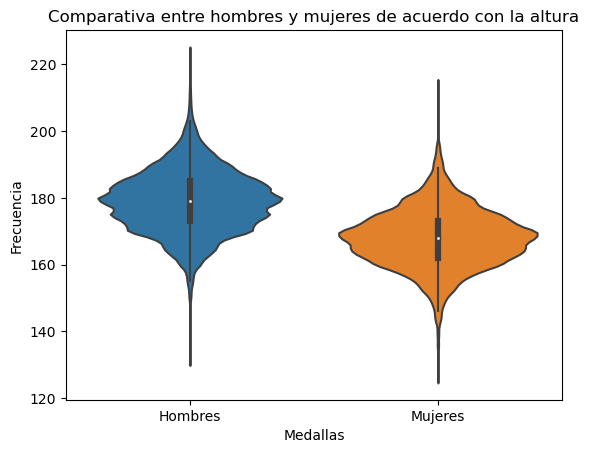

In [17]:
sb.violinplot(data=data, x="Sex", y="Height")
plt.title("Comparativa entre hombres y mujeres de acuerdo con la altura")
plt.xlabel("Medallas")
plt.ylabel("Frecuencia")
plt.xticks([0,1],["Hombres", "Mujeres"])
plt.show()

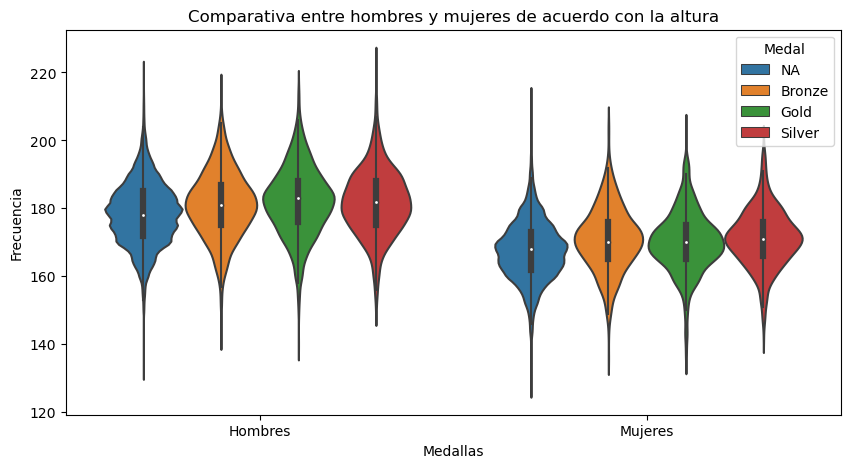

In [19]:
plt.figure(figsize=(10,5))
sb.violinplot(x=data["Sex"], y=data["Height"],hue=data['Medal'])
plt.title("Comparativa entre hombres y mujeres de acuerdo con la altura")
plt.xlabel("Medallas")
plt.ylabel("Frecuencia")
plt.xticks([0,1],["Hombres", "Mujeres"])
plt.show()

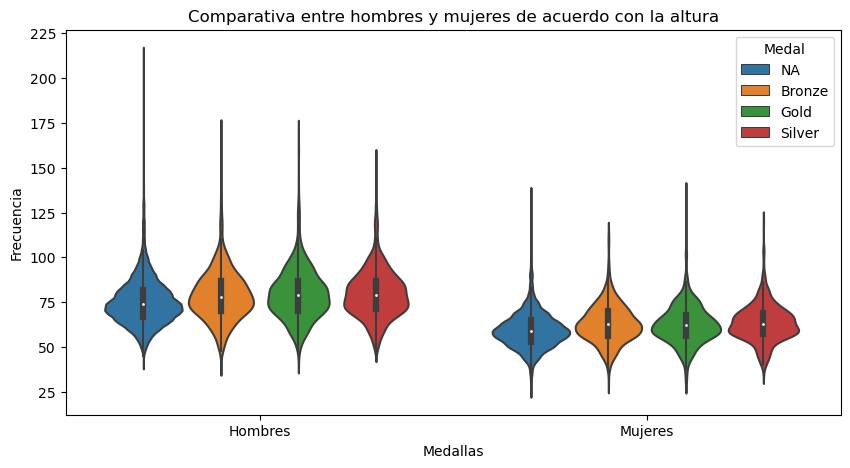

In [23]:
plt.figure(figsize=(10,5))
sb.violinplot(x=data["Sex"], y=data["Weight"],hue=data['Medal'])
plt.title("Comparativa entre hombres y mujeres de acuerdo con la altura")
plt.xlabel("Medallas")
plt.ylabel("Frecuencia")
plt.xticks([0,1],["Hombres", "Mujeres"])
plt.show()

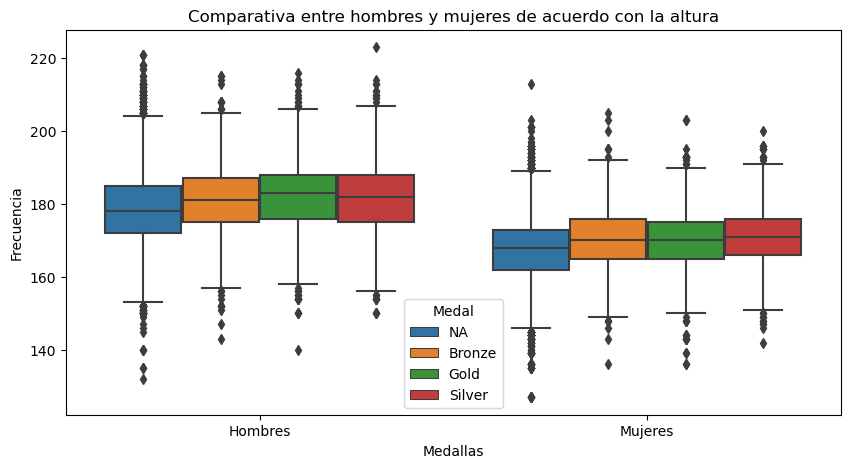

In [24]:
plt.figure(figsize=(10,5))
sb.boxplot(x=data["Sex"], y=data["Height"],hue=data['Medal'])
plt.title("Comparativa entre hombres y mujeres de acuerdo con la altura")
plt.xlabel("Medallas")
plt.ylabel("Frecuencia")
plt.xticks([0,1],["Hombres", "Mujeres"])
plt.show()

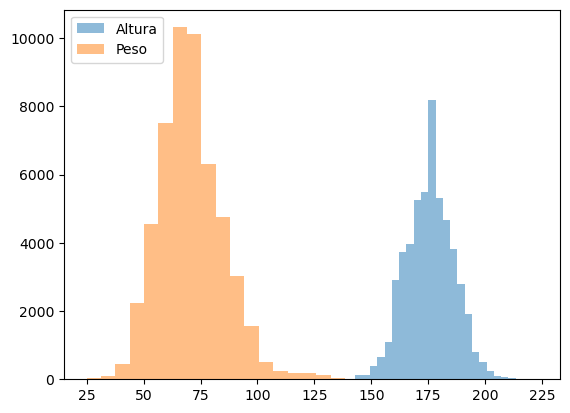

In [31]:
plt.hist(data["Height"], bins=30, label=["Altura"], alpha=0.5)
plt.hist(data['Weight'],bins=30, label=["Peso"], alpha=0.5)#El alpha solamente hace que sea opaco.
plt.legend(loc='upper left')
plt.show()

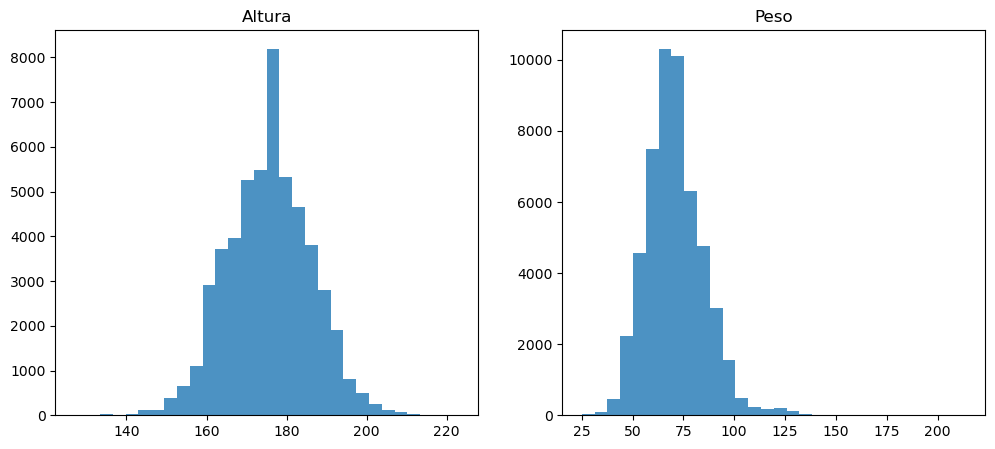

In [40]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(data["Height"], bins=30, alpha=0.8)
plt.title('Altura')

plt.subplot(1,2,2)
plt.hist(data["Weight"], bins=30, alpha=0.8)
plt.title('Peso')
plt.show()

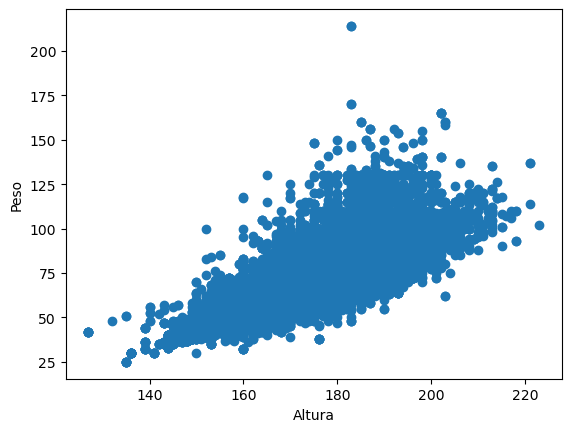

In [42]:
plt.scatter(x=data['Height'],y=data['Weight'])
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.show()

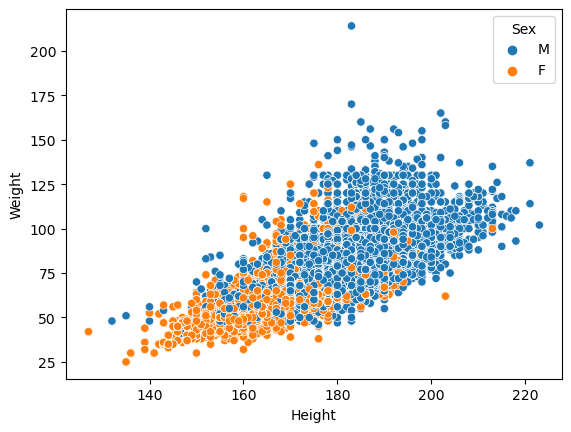

In [43]:
sb.scatterplot(x=data['Height'],y=data['Weight'],hue=data['Sex'])
plt.show()

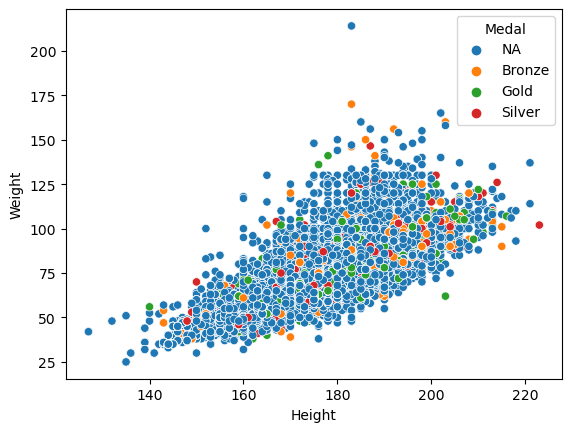

In [44]:
sb.scatterplot(x=data['Height'],y=data['Weight'],hue=data['Medal'])
plt.show()

In [67]:
df=pd.read_csv('adult_mejorado.csv')
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital gains      int64
capital-loss       int64
hrs/week           int64
Native country    object
label             object
dtype: object

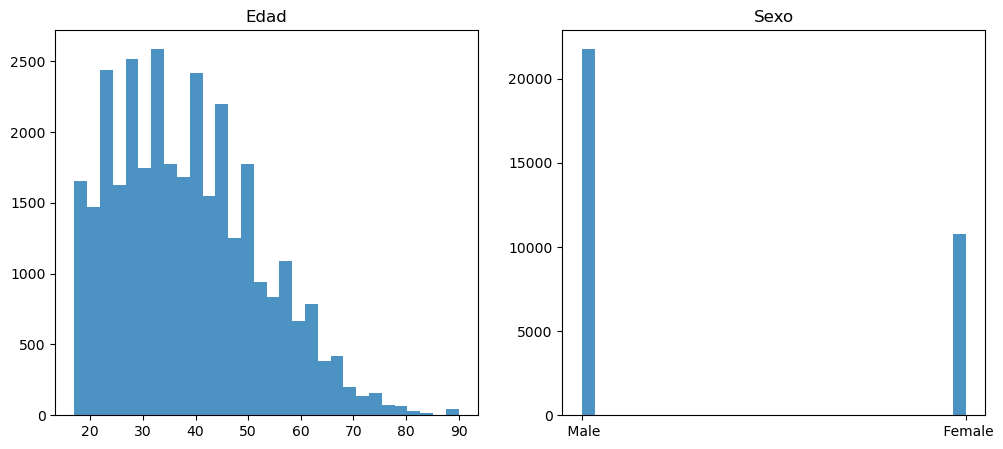

In [71]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df["age"], bins=30, alpha=0.8)
plt.title('Edad')

plt.subplot(1,2,2)
plt.hist(df["sex"], bins=30, alpha=0.8)
plt.title('Sexo')
plt.show()

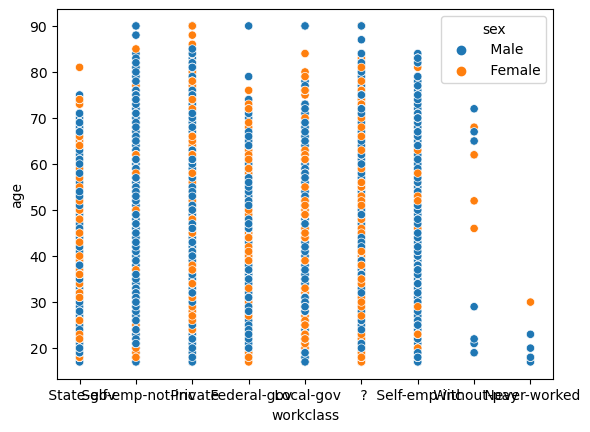

In [94]:
sb.scatterplot(x=df['workclass'],y=df['age'],hue=df['sex'])
plt.show()

# Regresion Lineal Simple

In [74]:
from sklearn.linear_model import LinearRegression as lr

In [75]:
altura=np.array(data['Height']).reshape(-1,1)

In [76]:
peso=np.array(data['Weight']).reshape(-1,1)

In [77]:
reg1 = lr().fit(peso,altura)

In [78]:
altura_pred=reg1.predict(peso)

In [79]:
print(reg1.coef_)

[[0.57484953]]


In [80]:
print(reg1.intercept_)

[134.82033013]


In [81]:
print(reg1.score(peso,altura))

0.6147367495426364


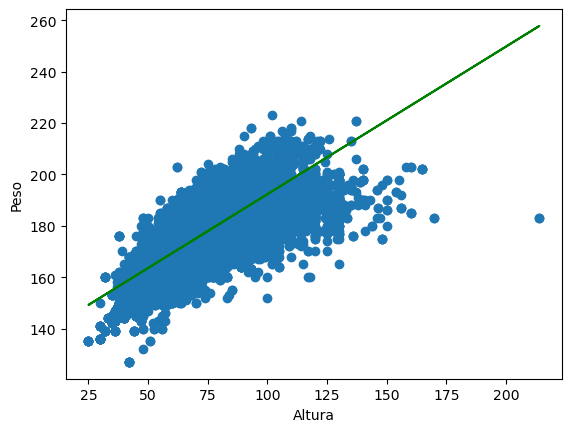

In [83]:
plt.scatter(x=data['Weight'],y=data['Height'])
plt.plot(peso,altura_pred, color="g")
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.show()

In [87]:
error=altura-altura_pred

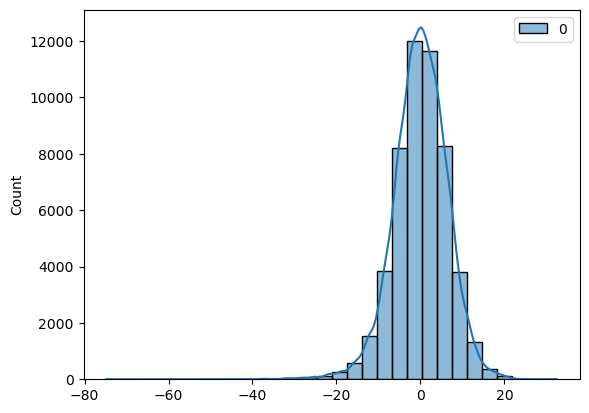

In [88]:
sb.histplot(data=error,bins=30,kde=True)
plt.show()

In [89]:
from scipy.stats import normaltest

In [90]:
normaltest(error) #Un valor de p<0.5 significa que se rechaza la hipotesis nula y se acepta la alternativa
#Ho: los datos se comportan de manera normal
#Ha: no son normal

NormaltestResult(statistic=array([5033.09308096]), pvalue=array([0.]))

In [91]:
peso2=sm.add_constant(peso)

In [93]:
reg2= sm.OLS(altura,peso2)
resultados = reg2.fit()
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                 8.339e+04
Date:                Mon, 28 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:50:26   Log-Likelihood:            -1.7170e+05
No. Observations:               52266   AIC:                         3.434e+05
Df Residuals:                   52264   BIC:                         3.434e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        134.8203      0.144    936.826      0.000     134.538     135.102
x1             0.5748      0.002    288.780      0.000       0.571       0.579
==============================================================================
Omnibus:                     5033.093   Durbin-Watson:                   0.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15996.694
Skew:                          -0.498   Prob(JB):                         0.00
Kurtosis:                       5.521   Cond. No.                         368.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""